In [1]:
import math as mt
import numpy as np
from matplotlib import pyplot as py
%matplotlib inline

In [2]:
# function for creating flow grid
def flowgrid (xstart, xend, ystart, yend, N):
    x = np.linspace(xstart,xend,N)
    y = np.linspace(ystart,yend,N)
    X,Y = np.meshgrid(x,y)
    return x,y,X,Y

In [3]:
# Defining grid of flow
N = 50
xstart, xend, ystart, yend = -2.0,2.0,-1.0,1.0
x,y,X,Y = flowgrid(xstart,xend,ystart,yend,N)

In [5]:
#function for vortex velocities and stream functions
def get_vel_psi_vortex(strength, xv, yv, X, Y):
    u = strength/(2*np.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = -strength/(2*np.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    psi = strength/(4*np.pi)*np.log((X-xv)**2+(Y-yv)**2)
    return u,v,psi

In [7]:
gamma = 5.0
xvortex,yvortex = 0.0,0.0

u_vortex,v_vortex,psi_vortex = get_vel_psi_vortex(gamma,xvortex,yvortex,X,Y)

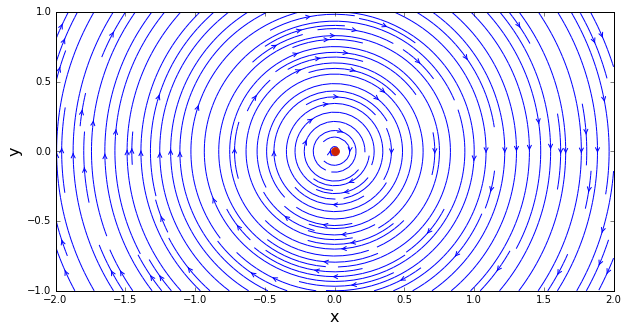

In [8]:
#plotting vortex
size = 10
py.figure(figsize = (size, (yend-ystart)/(xend - xstart)*size))
py.xlabel('x',fontsize = 16)
py.ylabel('y',fontsize = 16)
py.xlim(xstart,xend)
py.ylim(ystart,yend)
py.streamplot(X,Y,u_vortex, v_vortex, density = 2, linewidth=1, arrowsize=1, arrowstyle='->')
py.scatter(xvortex ,yvortex, color = '#CD2305', s=60, marker = 'o')

In [9]:
#sink
def get_vel_psi_sink(strength, xs, ys, X, Y):
    u = strength/(2*np.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*np.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    psi = strength/(2*np.pi)*np.arctan2((Y-ys),(X-xs))
    return u,v,psi

strength_sink,xsink,ysink = -1.0,0.0,0.0
usink,vsink,psi_sink = get_vel_psi_sink(strength_sink,xsink,ysink,X,Y)

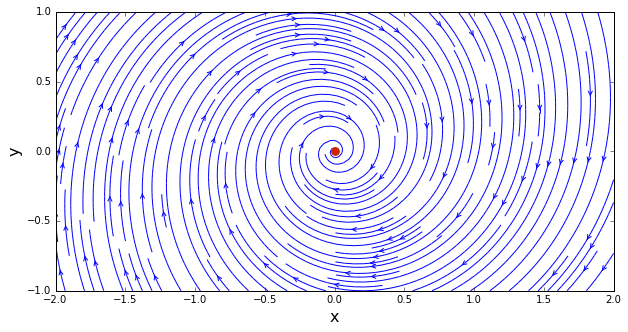

In [10]:
#vortex + sink
u = u_vortex + usink
v = v_vortex + vsink

#plot
py.figure(figsize = (size, (yend-ystart)/(xend - xstart)*size))
py.xlabel('x',fontsize = 16)
py.ylabel('y',fontsize = 16)
py.xlim(xstart,xend)
py.ylim(ystart,yend)
py.streamplot(X,Y,u, v, density = 2, linewidth=1, arrowsize=1, arrowstyle='->')
py.scatter(xvortex ,yvortex, color = '#CD2305', s=60, marker = 'o')